In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Hagamos una grafica de KDE manualmente.

(0, 1)

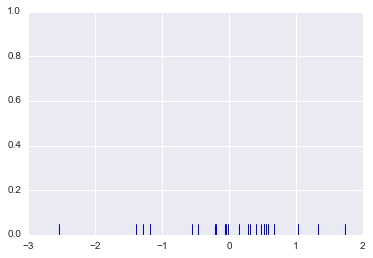

In [2]:
#Empezamos con una grafica de alfombra
#Esta grafica pone marcas cuando ocurre un valor

#Creamos conjunto de datos
dataset = randn(25)
#Creamos la grafica
sns.rugplot(dataset)
#Configuramos como limite el eje-y
plt.ylim(0,1)

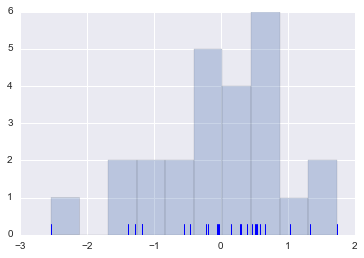

In [3]:
#Graficamos un histograma sobre de el 
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

La grafica de estimacion de densidad de kernel representara cada marca con una funcion base gaussiana.

(0, 1)

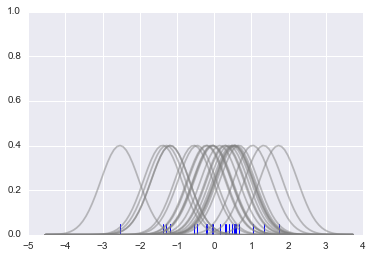

In [4]:
#Crear otra grafica de alfombra
sns.rugplot(dataset);

#COnfigurar el eje x de la grafica
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 puntos espaciados equitativamente de x_min a x_max
x_axis = np.linspace(x_min,x_max,100)

#Configurar el ancho de banda
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


#Crear una lista de kernel vacia
kernel_list = []

#Graficar cada funcion base
for data_point in dataset:
    
    #Crear un kernel por cada punto y agregarlo a la lista
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Escalar para graficar
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

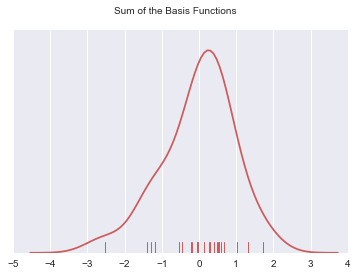

In [7]:
#Para obtener la grafica de KDE podemos sumar las funciones base

#Graficar la suma de las funciones base
sum_of_kde = np.sum(kernel_list,axis=0)

#Graficar la figura
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

#Agregar la grafica de alfombra original
sns.rugplot(dataset,c = 'indianred')

#Quitar las marcas en el eje y
plt.yticks([])

#Establecer titulo
plt.suptitle("Sum of the Basis Functions")

/home/luis/anaconda2/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


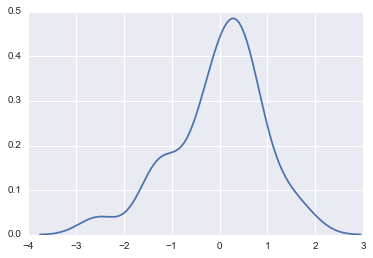

In [8]:
#Ahora hagamoslo con seaborn
sns.kdeplot(dataset)

/home/luis/anaconda2/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


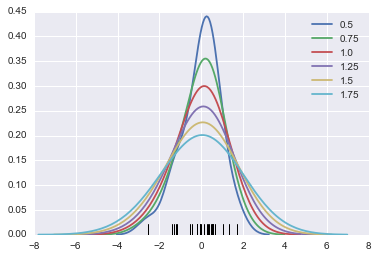

In [10]:
#Podemos ajustar el ancho de banda para hacer a la grafica de KDE mas o menos sensible a las altas frecuencias

#Grafica de alfombra
sns.rugplot(dataset,color='black')

#Graficar varios anchos de banda
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

/home/luis/anaconda2/envs/python3/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/home/luis/anaconda2/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


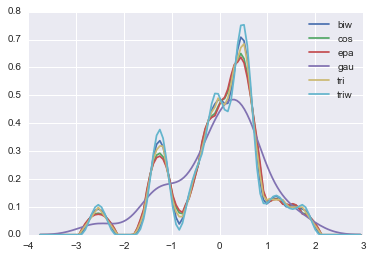

In [11]:
#Tambien podemos seleccionar varios Kernels
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

#Tipos
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

#Usamos label para poner la leyenda
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

/home/luis/anaconda2/envs/python3/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/home/luis/anaconda2/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


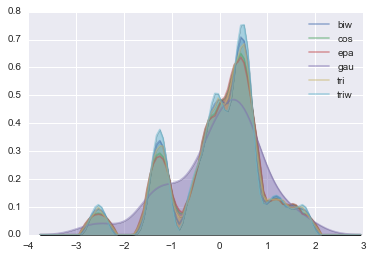

In [12]:
#Podemos sombrear la grafica
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

/home/luis/anaconda2/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


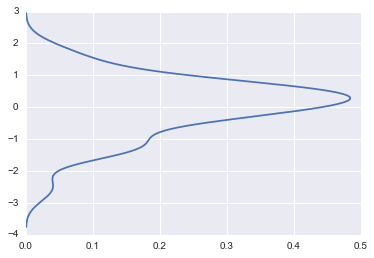

In [13]:
#Para eje vertical, usamos vertical
sns.kdeplot(dataset,vertical=True)

/home/luis/anaconda2/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


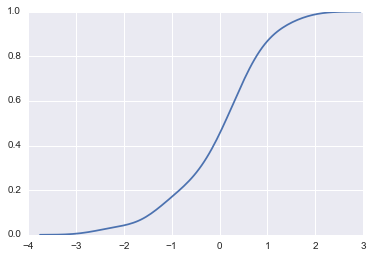

In [14]:
#Podemos usar la grafica KDE para crear una Funcion de Distribucion Acumulada (CDF) de los datos

#Informacion de CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

sns.kdeplot(dataset,cumulative=True)

### Estimacion de Densidad Multivariada usando kdeplot

Podemos usar kdeplot para datos multidimensionales.

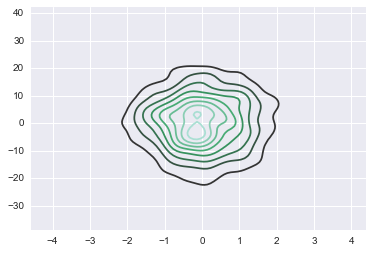

In [15]:
#Creamos un nuevo conjunto de datos

#Media el centro del los datos
mean = [0,0]

#Covarianza diagonal
cov = [[1,0],[0,100]]

#Crear un conjunto de datos usando numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

#Usamos pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

#Graficar el dataframe
sns.kdeplot(dframe)

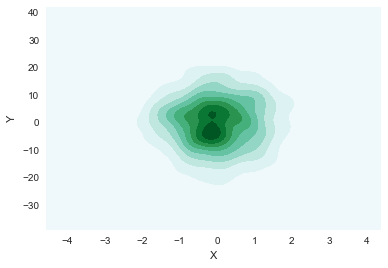

In [16]:
#Tambien le podemos pasar dos vectores separados y la sombra
sns.kdeplot(dframe.X,dframe.Y,shade=True)

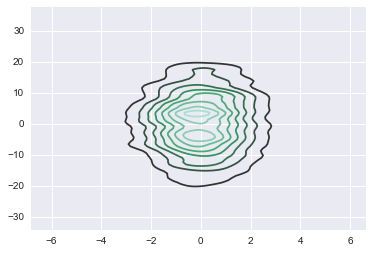

In [18]:
#Podemos especificar un ancho de banda particular
sns.kdeplot(dframe,bw=1)

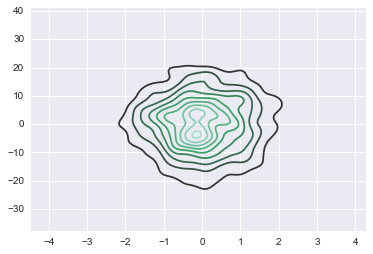

In [19]:
#O usar silverman
sns.kdeplot(dframe,bw='silverman')

/home/luis/anaconda2/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


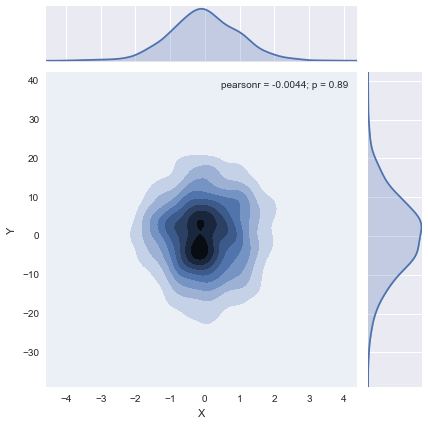

In [20]:
#Tambien podemos crear una grafica KDE joint plot
sns.jointplot('X','Y',dframe,kind='kde')